In [27]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
SPOTIFY_CLIENT_ID = '2ec294682f3d4d53a0b933dc486bd294'
SPOTIFY_CLIENT_SECRET = '4c3845c0b99442239e636930b6410122'
# SPOTIFY_REDIRECT_URI = ''
auth_manager = SpotifyClientCredentials(client_id=SPOTIFY_CLIENT_ID, client_secret=SPOTIFY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)
sp.me 

<bound method Spotify.me of <spotipy.client.Spotify object at 0x000001C5DFA51670>>

SEARCHING THE ARTIST

In [57]:
artist_name = 'Rema'
artists = sp.search(q='artist:'+artist_name,type='artist', limit=10)
print(artists)


{'artists': {'href': 'https://api.spotify.com/v1/search?query=artist%3ARema&type=artist&offset=0&limit=10', 'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/46pWGuE3dSwY3bMMXGBvVS'}, 'followers': {'href': None, 'total': 1176492}, 'genres': ['nigerian pop'], 'href': 'https://api.spotify.com/v1/artists/46pWGuE3dSwY3bMMXGBvVS', 'id': '46pWGuE3dSwY3bMMXGBvVS', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab6761610000e5eb3be9356af550873daa1e3a9b', 'width': 640}, {'height': 320, 'url': 'https://i.scdn.co/image/ab676161000051743be9356af550873daa1e3a9b', 'width': 320}, {'height': 160, 'url': 'https://i.scdn.co/image/ab6761610000f1783be9356af550873daa1e3a9b', 'width': 160}], 'name': 'Rema', 'popularity': 78, 'type': 'artist', 'uri': 'spotify:artist:46pWGuE3dSwY3bMMXGBvVS'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2zgG1GPDvjaBgxeQaVXI14'}, 'followers': {'href': None, 'total': 1153459}, 'genres': ['alternative metal', 'melodic metalcore

In [58]:
artist_uri = artists['artists']['items'][0]['uri']
print(artist_uri)

spotify:artist:46pWGuE3dSwY3bMMXGBvVS


In [59]:
results = sp.artist_top_tracks(artist_uri)


for track in results['tracks'][:10]:
    print('track    : ' + track['name'])
    print('track id : ' + track['id'])
    print('audio    : ' + str(track['preview_url']))
    print('cover art: ' + track['album']['images'][0]['url'])
    print()

track    : Calm Down (with Selena Gomez)
track id : 0WtM2NBVQNNJLh6scP13H8
audio    : None
cover art: https://i.scdn.co/image/ab67616d0000b273a3a7f38ea2033aa501afd4cf

track    : Calm Down
track id : 3BnDvpeuGOj21Ir2aVEtQo
audio    : None
cover art: https://i.scdn.co/image/ab67616d0000b273ffa52727feedfd1935d160c4

track    : Dumebi
track id : 0SjQBdIddPvKSWxr8vk6QX
audio    : None
cover art: https://i.scdn.co/image/ab67616d0000b27381c04ab39b75f83ee9849a08

track    : Sad Girls (feat. Rema)
track id : 2lN5P2zk7ZHpxCutNHSndT
audio    : https://p.scdn.co/mp3-preview/cff357df09b07f3734a4ba4932c87137e7149c97?cid=2ec294682f3d4d53a0b933dc486bd294
cover art: https://i.scdn.co/image/ab67616d0000b273f7c841175271dd91cd89e407

track    : Ayo Girl (Fayahh Beat) [feat. Rema]
track id : 57Hk0AE5OhgXrPWZOhipHt
audio    : https://p.scdn.co/mp3-preview/9e8d066ec198ca1bca3c7aed2b9101ebab33576d?cid=2ec294682f3d4d53a0b933dc486bd294
cover art: https://i.scdn.co/image/ab67616d0000b2733d39fc813899b38b4efb80eb

EXTRACT TRACKS

In [60]:
import pandas as pd
track_result = []
for i, item in enumerate(results['tracks']):
#     track = item['album']
    track_id = item['id']
    track_name = item['name']
    popularity = item['popularity']
    track_result.append((i, artist_name, track['name'], track_id, track_name, item['album']['release_date'], popularity))

track_df = pd.DataFrame(track_result, index=None, columns=('Item', 'Artist', 'Album Name', 'Id', 'Song Name', 'Release Date', 'Popularity'))
track_df


,Item,Artist,Album Name,Id,Song Name,Release Date,Popularity
0,0,Rema,Corny,0WtM2NBVQNNJLh6scP13H8,Calm Down (with Selena Gomez),2022-08-25,90
1,1,Rema,Corny,3BnDvpeuGOj21Ir2aVEtQo,Calm Down,2022-03-24,78
2,2,Rema,Corny,0SjQBdIddPvKSWxr8vk6QX,Dumebi,2019-03-22,69
3,3,Rema,Corny,2lN5P2zk7ZHpxCutNHSndT,Sad Girls (feat. Rema),2022-09-09,69
4,4,Rema,Corny,57Hk0AE5OhgXrPWZOhipHt,Ayo Girl (Fayahh Beat) [feat. Rema],2022-03-15,68
5,5,Rema,Corny,2psl5iNJCrmmm2XtS7LZqb,Soundgasm,2022-03-24,66
6,6,Rema,Corny,0aMOalD335v1hsSXmLURzz,Time N Affection,2022-03-24,64
7,7,Rema,Corny,0PCyd8O4CkIBcJxmDafTxX,One Time,2022-05-12,62
8,8,Rema,Corny,2Jy4EdqIZswDZvVDh5dx3A,Dimension (feat. Skepta & Rema),2021-03-18,62
9,9,Rema,Corny,45DflAgf5cA8pFRmwV3JMM,Corny,2019-03-22,60


EXTRACT TRACK FEATURES


In [61]:
features_df = pd.DataFrame()
for id in track_df['Id'].iteritems():
    track_id = id[1]
    audio_features = sp.audio_features(track_id)
    local_features = pd.DataFrame(audio_features, index=[0])
    features_df = features_df.append(local_features)
features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.801,0.806,11,-5.206,1,0.0381,0.38200,0.000669,0.1140,0.802,106.999,audio_features,0WtM2NBVQNNJLh6scP13H8,spotify:track:0WtM2NBVQNNJLh6scP13H8,https://api.spotify.com/v1/tracks/0WtM2NBVQNNJ...,https://api.spotify.com/v1/audio-analysis/0WtM...,239318,4
0,0.814,0.789,11,-6.290,1,0.0405,0.36500,0.000502,0.1370,0.842,107.003,audio_features,3BnDvpeuGOj21Ir2aVEtQo,spotify:track:3BnDvpeuGOj21Ir2aVEtQo,https://api.spotify.com/v1/tracks/3BnDvpeuGOj2...,https://api.spotify.com/v1/audio-analysis/3BnD...,219669,4
0,0.923,0.657,3,-5.173,0,0.0605,0.19900,0.004070,0.1080,0.734,110.015,audio_features,0SjQBdIddPvKSWxr8vk6QX,spotify:track:0SjQBdIddPvKSWxr8vk6QX,https://api.spotify.com/v1/tracks/0SjQBdIddPvK...,https://api.spotify.com/v1/audio-analysis/0SjQ...,179775,4
0,0.789,0.862,5,-7.787,1,0.1410,0.30500,0.000006,0.3400,0.507,115.005,audio_features,2lN5P2zk7ZHpxCutNHSndT,spotify:track:2lN5P2zk7ZHpxCutNHSndT,https://api.spotify.com/v1/tracks/2lN5P2zk7ZHp...,https://api.spotify.com/v1/audio-analysis/2lN5...,163473,4
0,0.647,0.766,6,-4.803,1,0.0389,0.00702,0.000000,0.0960,0.550,95.016,audio_features,57Hk0AE5OhgXrPWZOhipHt,spotify:track:57Hk0AE5OhgXrPWZOhipHt,https://api.spotify.com/v1/tracks/57Hk0AE5OhgX...,https://api.spotify.com/v1/audio-analysis/57Hk...,165216,4
0,0.805,0.525,6,-7.376,0,0.0638,0.11900,0.002030,0.0779,0.693,100.033,audio_features,2psl5iNJCrmmm2XtS7LZqb,spotify:track:2psl5iNJCrmmm2XtS7LZqb,https://api.spotify.com/v1/tracks/2psl5iNJCrmm...,https://api.spotify.com/v1/audio-analysis/2psl...,204755,4
0,0.549,0.689,9,-6.667,0,0.1180,0.30600,0.000000,0.0785,0.268,108.643,audio_features,0aMOalD335v1hsSXmLURzz,spotify:track:0aMOalD335v1hsSXmLURzz,https://api.spotify.com/v1/tracks/0aMOalD335v1...,https://api.spotify.com/v1/audio-analysis/0aMO...,230722,4
0,0.855,0.532,11,-6.813,1,0.1930,0.24300,0.000000,0.0645,0.928,102.103,audio_features,0PCyd8O4CkIBcJxmDafTxX,spotify:track:0PCyd8O4CkIBcJxmDafTxX,https://api.spotify.com/v1/tracks/0PCyd8O4CkIB...,https://api.spotify.com/v1/audio-analysis/0PCy...,189521,4
0,0.561,0.722,4,-6.437,0,0.0680,0.17300,0.000049,0.1750,0.173,103.099,audio_features,2Jy4EdqIZswDZvVDh5dx3A,spotify:track:2Jy4EdqIZswDZvVDh5dx3A,https://api.spotify.com/v1/tracks/2Jy4EdqIZswD...,https://api.spotify.com/v1/audio-analysis/2Jy4...,234027,4
0,0.494,0.777,7,-3.009,0,0.1300,0.33500,0.091100,0.1160,0.506,95.012,audio_features,45DflAgf5cA8pFRmwV3JMM,spotify:track:45DflAgf5cA8pFRmwV3JMM,https://api.spotify.com/v1/tracks/45DflAgf5cA8...,https://api.spotify.com/v1/audio-analysis/45Df...,227456,4


In [62]:
final_df = track_df.merge(features_df, left_on="Id", right_on="id")
final_df


,Item,Artist,Album Name,Id,Song Name,Release Date,Popularity,danceability,energy,key,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,Rema,Corny,0WtM2NBVQNNJLh6scP13H8,Calm Down (with Selena Gomez),2022-08-25,90,0.801,0.806,11,...,0.1140,0.802,106.999,audio_features,0WtM2NBVQNNJLh6scP13H8,spotify:track:0WtM2NBVQNNJLh6scP13H8,https://api.spotify.com/v1/tracks/0WtM2NBVQNNJ...,https://api.spotify.com/v1/audio-analysis/0WtM...,239318,4
1,1,Rema,Corny,3BnDvpeuGOj21Ir2aVEtQo,Calm Down,2022-03-24,78,0.814,0.789,11,...,0.1370,0.842,107.003,audio_features,3BnDvpeuGOj21Ir2aVEtQo,spotify:track:3BnDvpeuGOj21Ir2aVEtQo,https://api.spotify.com/v1/tracks/3BnDvpeuGOj2...,https://api.spotify.com/v1/audio-analysis/3BnD...,219669,4
2,2,Rema,Corny,0SjQBdIddPvKSWxr8vk6QX,Dumebi,2019-03-22,69,0.923,0.657,3,...,0.1080,0.734,110.015,audio_features,0SjQBdIddPvKSWxr8vk6QX,spotify:track:0SjQBdIddPvKSWxr8vk6QX,https://api.spotify.com/v1/tracks/0SjQBdIddPvK...,https://api.spotify.com/v1/audio-analysis/0SjQ...,179775,4
3,3,Rema,Corny,2lN5P2zk7ZHpxCutNHSndT,Sad Girls (feat. Rema),2022-09-09,69,0.789,0.862,5,...,0.3400,0.507,115.005,audio_features,2lN5P2zk7ZHpxCutNHSndT,spotify:track:2lN5P2zk7ZHpxCutNHSndT,https://api.spotify.com/v1/tracks/2lN5P2zk7ZHp...,https://api.spotify.com/v1/audio-analysis/2lN5...,163473,4
4,4,Rema,Corny,57Hk0AE5OhgXrPWZOhipHt,Ayo Girl (Fayahh Beat) [feat. Rema],2022-03-15,68,0.647,0.766,6,...,0.0960,0.550,95.016,audio_features,57Hk0AE5OhgXrPWZOhipHt,spotify:track:57Hk0AE5OhgXrPWZOhipHt,https://api.spotify.com/v1/tracks/57Hk0AE5OhgX...,https://api.spotify.com/v1/audio-analysis/57Hk...,165216,4
5,5,Rema,Corny,2psl5iNJCrmmm2XtS7LZqb,Soundgasm,2022-03-24,66,0.805,0.525,6,...,0.0779,0.693,100.033,audio_features,2psl5iNJCrmmm2XtS7LZqb,spotify:track:2psl5iNJCrmmm2XtS7LZqb,https://api.spotify.com/v1/tracks/2psl5iNJCrmm...,https://api.spotify.com/v1/audio-analysis/2psl...,204755,4
6,6,Rema,Corny,0aMOalD335v1hsSXmLURzz,Time N Affection,2022-03-24,64,0.549,0.689,9,...,0.0785,0.268,108.643,audio_features,0aMOalD335v1hsSXmLURzz,spotify:track:0aMOalD335v1hsSXmLURzz,https://api.spotify.com/v1/tracks/0aMOalD335v1...,https://api.spotify.com/v1/audio-analysis/0aMO...,230722,4
7,7,Rema,Corny,0PCyd8O4CkIBcJxmDafTxX,One Time,2022-05-12,62,0.855,0.532,11,...,0.0645,0.928,102.103,audio_features,0PCyd8O4CkIBcJxmDafTxX,spotify:track:0PCyd8O4CkIBcJxmDafTxX,https://api.spotify.com/v1/tracks/0PCyd8O4CkIB...,https://api.spotify.com/v1/audio-analysis/0PCy...,189521,4
8,8,Rema,Corny,2Jy4EdqIZswDZvVDh5dx3A,Dimension (feat. Skepta & Rema),2021-03-18,62,0.561,0.722,4,...,0.1750,0.173,103.099,audio_features,2Jy4EdqIZswDZvVDh5dx3A,spotify:track:2Jy4EdqIZswDZvVDh5dx3A,https://api.spotify.com/v1/tracks/2Jy4EdqIZswD...,https://api.spotify.com/v1/audio-analysis/2Jy4...,234027,4
9,9,Rema,Corny,45DflAgf5cA8pFRmwV3JMM,Corny,2019-03-22,60,0.494,0.777,7,...,0.1160,0.506,95.012,audio_features,45DflAgf5cA8pFRmwV3JMM,spotify:track:45DflAgf5cA8pFRmwV3JMM,https://api.spotify.com/v1/tracks/45DflAgf5cA8...,https://api.spotify.com/v1/audio-analysis/45Df...,227456,4


SORT BY FEATURE

In [63]:
final_df_sorted = final_df.sort_values(by=['Popularity'], ascending=False)
feature_name = "danceability"
df_plot = final_df_sorted[['Artist', 'Album Name', 'Song Name', 'Release Date', 'Popularity', f'{feature_name}']]
df_plot



,Artist,Album Name,Song Name,Release Date,Popularity,danceability
0,Rema,Corny,Calm Down (with Selena Gomez),2022-08-25,90,0.801
1,Rema,Corny,Calm Down,2022-03-24,78,0.814
2,Rema,Corny,Dumebi,2019-03-22,69,0.923
3,Rema,Corny,Sad Girls (feat. Rema),2022-09-09,69,0.789
4,Rema,Corny,Ayo Girl (Fayahh Beat) [feat. Rema],2022-03-15,68,0.647
5,Rema,Corny,Soundgasm,2022-03-24,66,0.805
6,Rema,Corny,Time N Affection,2022-03-24,64,0.549
7,Rema,Corny,One Time,2022-05-12,62,0.855
8,Rema,Corny,Dimension (feat. Skepta & Rema),2021-03-18,62,0.561
9,Rema,Corny,Corny,2019-03-22,60,0.494


No handles with labels found to put in legend.


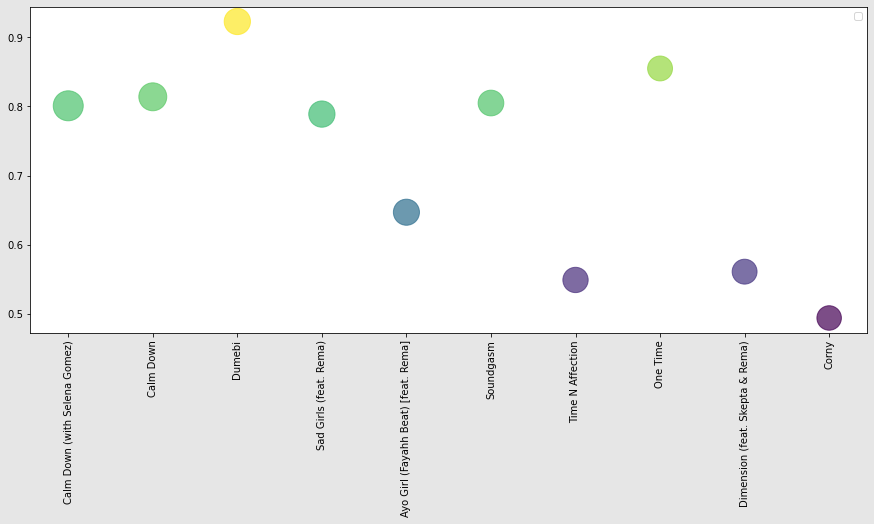

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(15, 6), facecolor=(.9, .9, .9))
    
x = df_plot['Song Name']
y = df_plot[feature_name]
s = df_plot['Popularity']*10
    
# color_labels = reco_df['explicit'].unique()
# rgb_values = sns.color_palette("Set1", 8)
# color_map = dict(zip(color_labels, rgb_values))

plt.scatter(x, y, s, alpha=0.7, c=df_plot[feature_name])
plt.xticks(rotation=90)
plt.legend()
# show the graph
plt.show()

In [66]:
import altair as alt
alt.Chart(df_plot).mark_circle().encode(
alt.X('Popularity', scale=alt.Scale(zero=False)), y=f'{feature_name}', color=alt.Color('Popularity', scale=alt.Scale(zero=False)), 
size=alt.value(200), tooltip=['Popularity', f'{feature_name}', 'Song Name', 'Album Name'])

alt.Chart(...)